(20, 1) (20, 1)


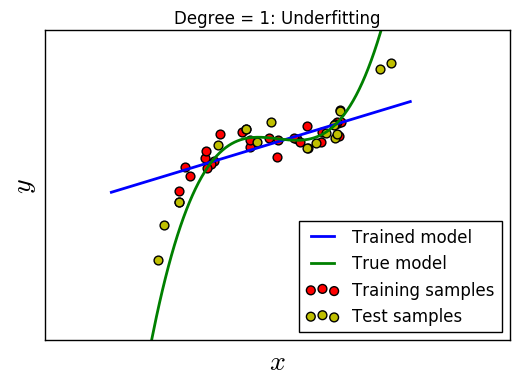

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


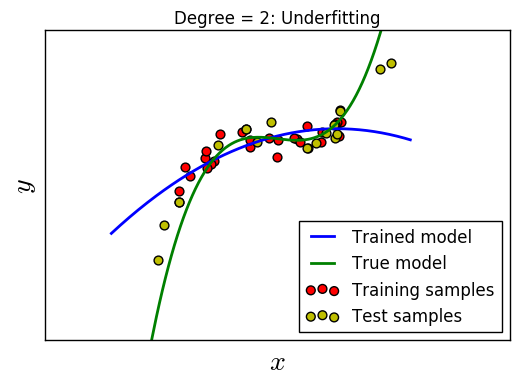

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


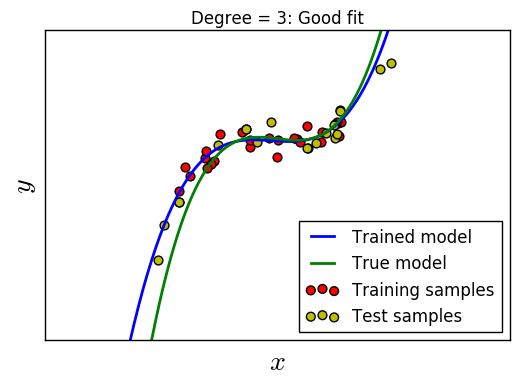

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


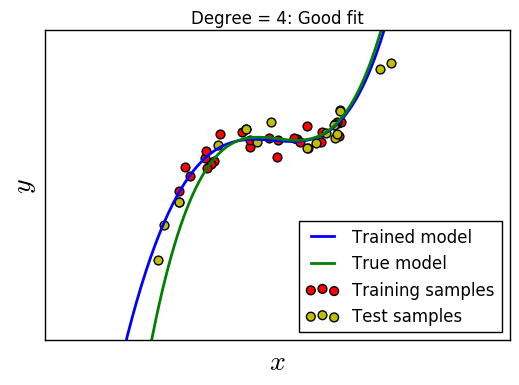

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


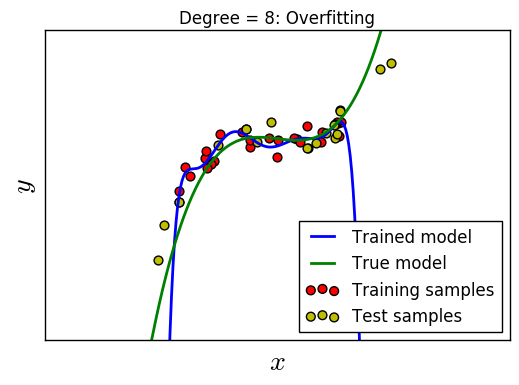

[[ -8.31452005e+01   3.47714187e+02  -1.03309551e+03   1.48372383e+03
   -1.08580923e+03   4.36091506e+02  -9.77083149e+01   1.14715264e+01
   -5.50276444e-01]]
(20, 1) (20, 1)


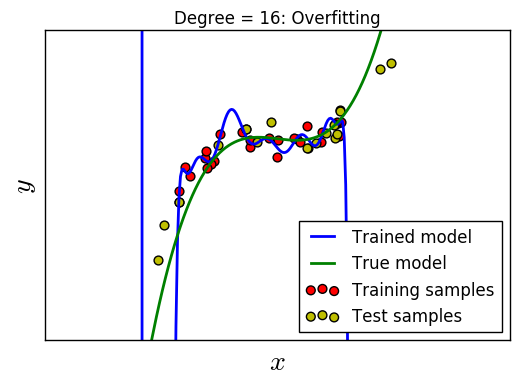

[[ -1.13966732e+02   1.48507061e+03  -1.06960501e+04   3.60296377e+04
   -6.18746517e+04   5.04171246e+04  -1.05545934e+03  -3.90931270e+04
    4.21741224e+04  -2.45097143e+04   9.16680856e+03  -2.30856332e+03
    3.91299609e+02  -4.30362089e+01   2.80114194e+00  -8.50164915e-02
    3.07865580e-04]]


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in xrange(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in xrange(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

